<h3>Data Wrangling</h3>

In [183]:
import pandas as pd
import numpy as np

<h4>Read Data</h4>

In [184]:
data = pd.read_csv("data_input/Female Daily Skincare Review Final.csv")

<h4>Check and Drop Missing Value</h4>

In [185]:
data.isna().sum()

Reviewer       2
Recommend      0
Stars          0
Date           0
Product        0
Category       0
Date Scrape    0
Url            0
dtype: int64

In [186]:
data = data.dropna()

In [187]:
data.isna().sum()

Reviewer       0
Recommend      0
Stars          0
Date           0
Product        0
Category       0
Date Scrape    0
Url            0
dtype: int64

<h4>Check and Drop Duplicated Data</h4>

In [188]:
data.duplicated().sum()

8105

In [189]:
data.drop_duplicates(keep = "first", inplace = True)

In [190]:
data.duplicated().sum()

0

In [191]:
data.head(4)

,Reviewer,Recommend,Stars,Date,Product,Category,Date Scrape,Url
0,Ayuika,No,3,5 days ago,Perfect 3D Gel,Night Cream,2020-02-24 13:35:12.875052,https://reviews.femaledaily.com/products/moist...
1,yustinalupit,Yes,4,16 Feb 2020,Perfect 3D Gel,Night Cream,2020-02-24 13:35:12.876053,https://reviews.femaledaily.com/products/moist...
2,evikdanny,No,3,13 Feb 2020,Perfect 3D Gel,Night Cream,2020-02-24 13:35:12.878054,https://reviews.femaledaily.com/products/moist...
3,daniskhoirun,Yes,3,08 Feb 2020,Perfect 3D Gel,Night Cream,2020-02-24 13:35:12.880038,https://reviews.femaledaily.com/products/moist...


<h4>Drop unused column</h4>

In [192]:
data.drop(['Recommend','Date','Date Scrape','Url'], axis=1, inplace=True)

In [193]:
data

,Reviewer,Stars,Product,Category
0,Ayuika,3,Perfect 3D Gel,Night Cream
1,yustinalupit,4,Perfect 3D Gel,Night Cream
2,evikdanny,3,Perfect 3D Gel,Night Cream
3,daniskhoirun,3,Perfect 3D Gel,Night Cream
4,hulahup19,5,Perfect 3D Gel,Night Cream
...,...,...,...,...
164239,steph91,4,Ultra Rapid Action Pad,Toner
164240,farishaalamsyah,1,Ultra Rapid Action Pad,Toner
164241,imeldanababan,4,Ultra Rapid Action Pad,Toner
164242,princessvie,3,Ultra Rapid Action Pad,Toner


In [194]:
data['id_rev'] = pd.factorize(data.Reviewer)[0]

In [195]:
data['id_prod'] = pd.factorize(data.Product)[0]

In [196]:
data['id_cat'] =  pd.factorize(data.Category)[0]

In [197]:
data.head(5)

,Reviewer,Stars,Product,Category,id_rev,id_prod,id_cat
0,Ayuika,3,Perfect 3D Gel,Night Cream,0,0,0
1,yustinalupit,4,Perfect 3D Gel,Night Cream,1,0,0
2,evikdanny,3,Perfect 3D Gel,Night Cream,2,0,0
3,daniskhoirun,3,Perfect 3D Gel,Night Cream,3,0,0
4,hulahup19,5,Perfect 3D Gel,Night Cream,4,0,0


In [198]:
#data_new = data[['id_rev','id_prod','id_cat','Stars']]
from surprise import Reader
from surprise import Dataset
reader = Reader(rating_scale=(1, 5))
# The columns must correspond to user id, item id and ratings (in that order).
data_new = Dataset.load_from_df(data[['id_rev','id_prod','Stars']], reader)

In [ ]:
anti_set = data_new.build_full_trainset().build_anti_testset()

In [223]:
anti_set

<h4>Check Data Types</h4>

In [199]:
data.dtypes

Reviewer    object
Stars        int64
Product     object
Category    object
id_rev       int64
id_prod      int64
id_cat       int64
dtype: object

<h3>Data Exploration</h3>

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns


<h4>Get the unique values from Product and User </h4>

In [201]:
uniq_product = data.Product.nunique()

In [202]:
print("Number of uniq product :",uniq_product)


Number of uniq product : 3322


In [203]:
uniq_reviewer = data.Reviewer.nunique()

In [204]:
print("Number of uniq reviewer :",uniq_reviewer)

Number of uniq reviewer : 41197


<h4>Get distribution of stars</h4>

(array([2.0000e+00, 0.0000e+00, 6.1970e+03, 0.0000e+00, 1.3470e+04,
        0.0000e+00, 2.9615e+04, 0.0000e+00, 4.7639e+04, 5.9214e+04]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

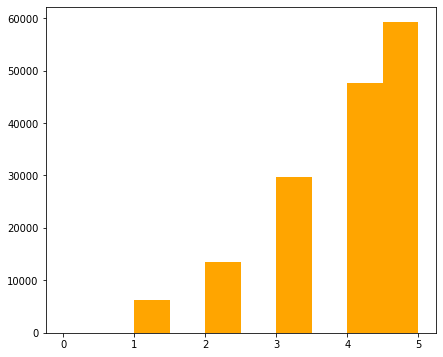

In [205]:
plt.subplots(figsize = (7,6))
plt.hist(data['Stars'],color="orange")

<h4>Get stars frequency in each product</h4>

In [206]:
#how many time product has been given stars by reviewer
prod_freq = pd.crosstab(index = data.Product, columns = "freq_of_product").sort_values(ascending=False, by="freq_of_product").\
            head(10).reset_index()

In [207]:
prod_freq.head()

col_0,Product,freq_of_product
0,Real Nature Mask Sheet,957
1,7 Days Mask,664
2,My Real Squeeze Mask,663
3,It's Real Squeeze Mask,624
4,Milk Cleanser,617


In [208]:
from surprise.model_selection import train_test_split
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold

In [211]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
kf = KFold(n_splits=3)
algo = KNNBasic()
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data_new):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_pred = predictions

# for algorithm in [SVD(), KNNBaseline(), KNNBasic(), KNNWithMeans()]:
#     # Perform cross validation
#     results = cross_validate(algorithm, data_new, measures=['RMSE'], cv=3, verbose=False)

Computing the msd similarity matrix...


MemoryError: 

In [214]:

algo = SVD()
perf = cross_validate(algo, data_new, measures=['RMSE', 'MAE'], cv=3)


In [215]:
perf

{'test_rmse': array([1.03869252, 1.02623651, 1.02348901]),
 'test_mae': array([0.82534595, 0.81986267, 0.81474872]),
 'fit_time': (10.542129516601562, 12.424153566360474, 10.731456756591797),
 'test_time': (438.9613800048828, 23.411104202270508, 0.5433988571166992)}

In [221]:
algo = KNNWithMeans()
perf = cross_validate(algo, data_new, measures=['RMSE'], cv=3)

Computing the msd similarity matrix...


MemoryError: 